In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv', index_col='Order Date', parse_dates=True)
df = df.dropna()        # drops null values
print('Shape of data', df.shape)
data = df
df.head()

Shape of data (4234, 10)


,Order ID,Customer Name,Category,Sub Category,City,Region,Sales,Profit,YearMonth,Expiry Date
Order Date,,,,,,,,,,
2015-01-03,OD3324,Jackson,Bakery,Breads & Buns,Salem,Central,864,380.16,2015-01,2015-01-10
2015-01-04,OD740,Haseena,Bakery,Cakes,Nagercoil,Central,2033,325.28,2015-01,2015-01-07
2015-01-05,OD3873,Verma,"Eggs, Meat & Fish",Fish,Tirunelveli,East,878,149.26,2015-01,2015-01-07
2015-01-06,OD9396,Hussain,Fruits & Veggies,Organic Vegetables,Chennai,South,2201,352.16,2015-01,2015-01-13
2015-01-06,OD9923,Esther,"Eggs, Meat & Fish",Fish,Cumbum,North,1258,364.82,2015-01,2015-01-08


Plotting various graphs for visualization

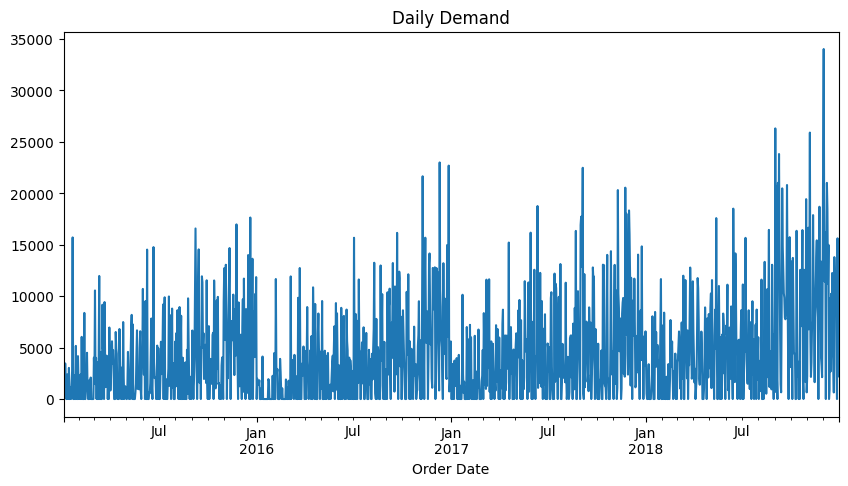

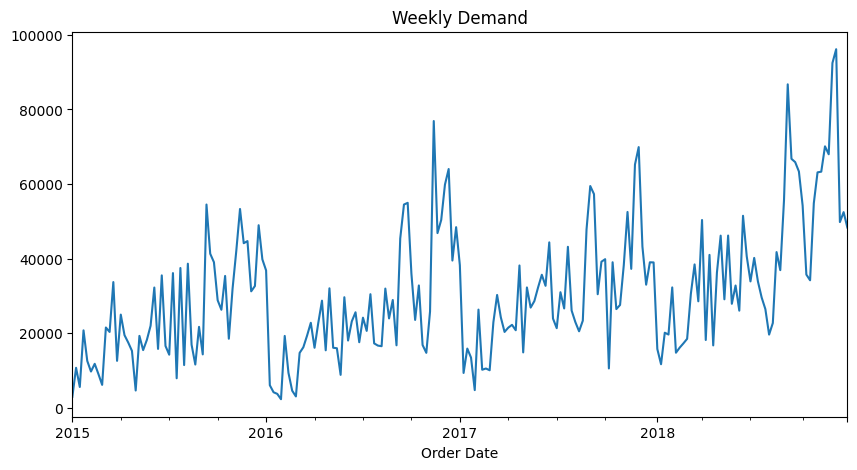

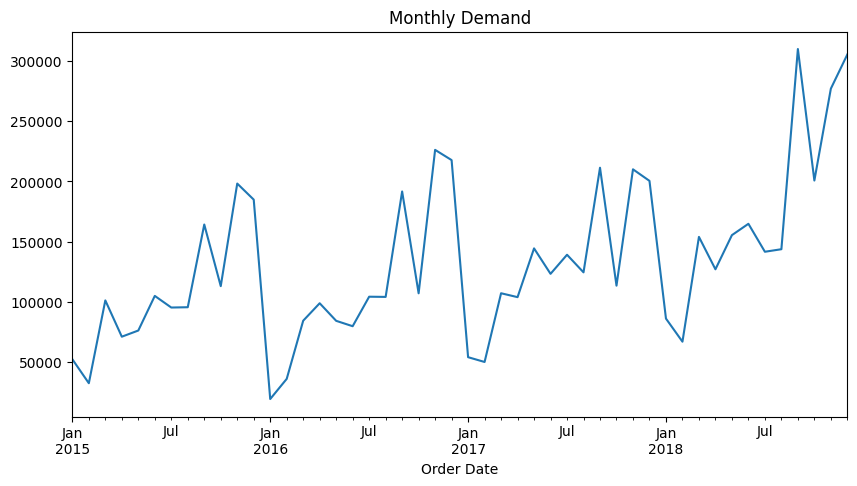

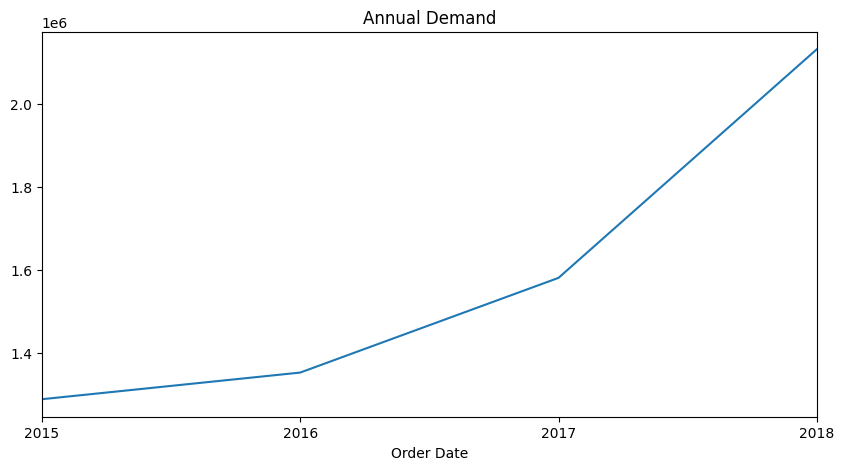

In [2]:
import matplotlib.pyplot as plt


daily_demand = df.resample('D')['Sales'].sum()  
daily_demand.plot(title='Daily Demand', figsize=(10, 5))
plt.show()


weekly_demand = df.resample('W')['Sales'].sum()  
weekly_demand.plot(title='Weekly Demand', figsize=(10, 5))
plt.show()


monthly_demand = df.resample('ME')['Sales'].sum()  
monthly_demand.plot(title='Monthly Demand', figsize=(10, 5))
plt.show()


annual_demand = df.resample('YE')['Sales'].sum()  
annual_demand.plot(title='Annual Demand', figsize=(10, 5))
plt.show()

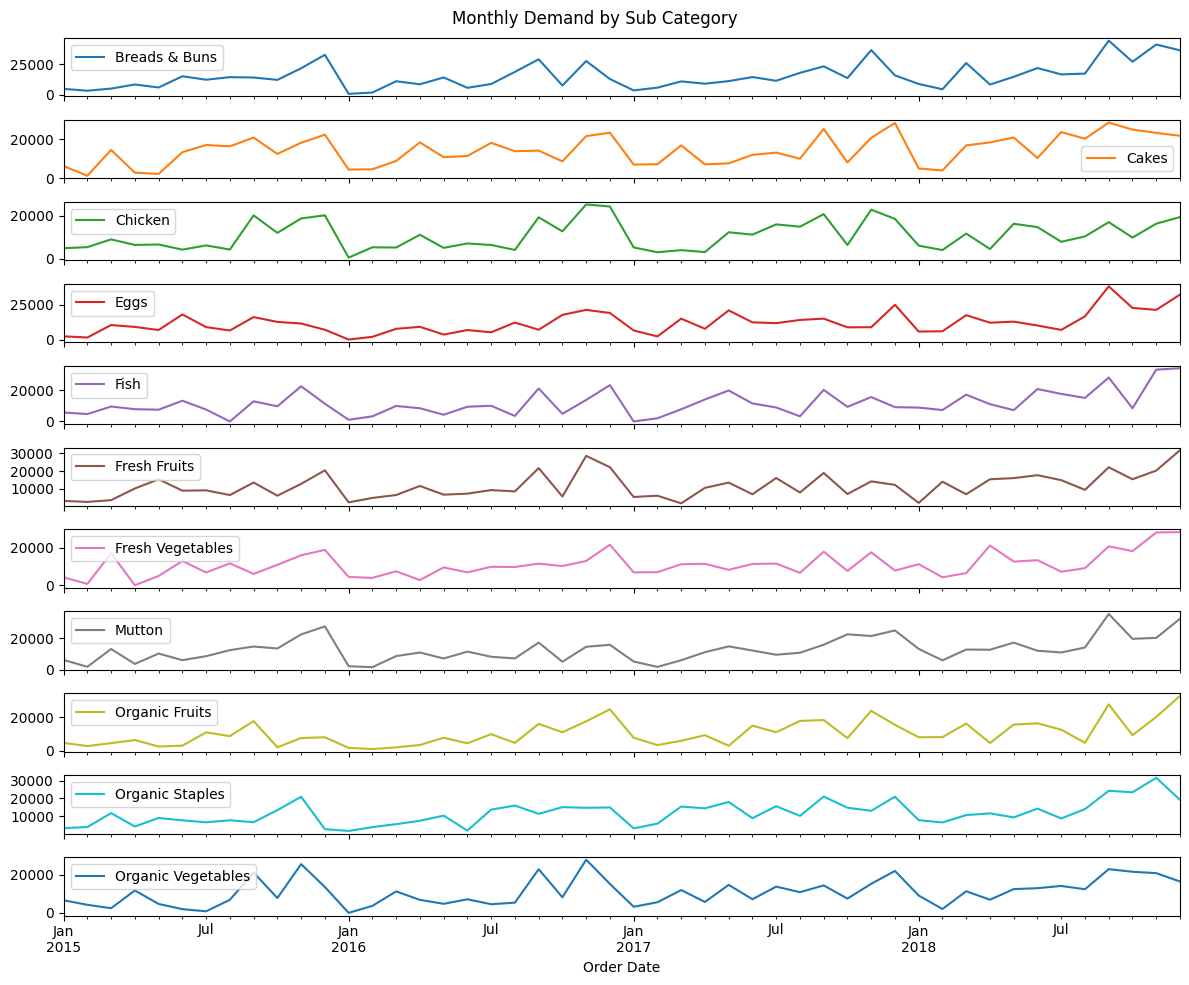

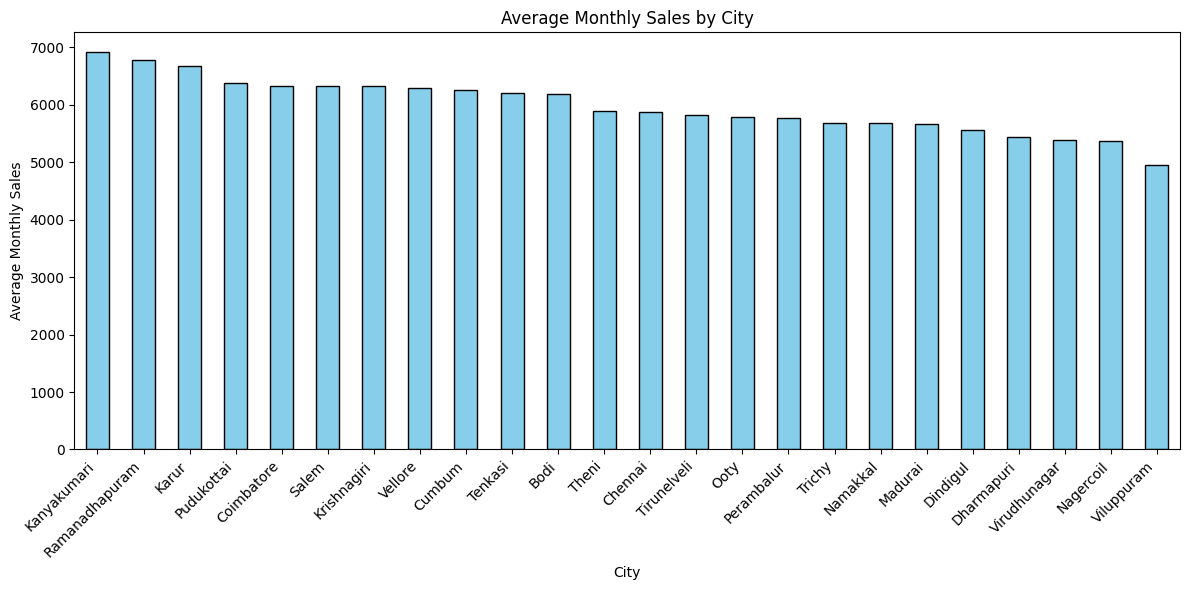

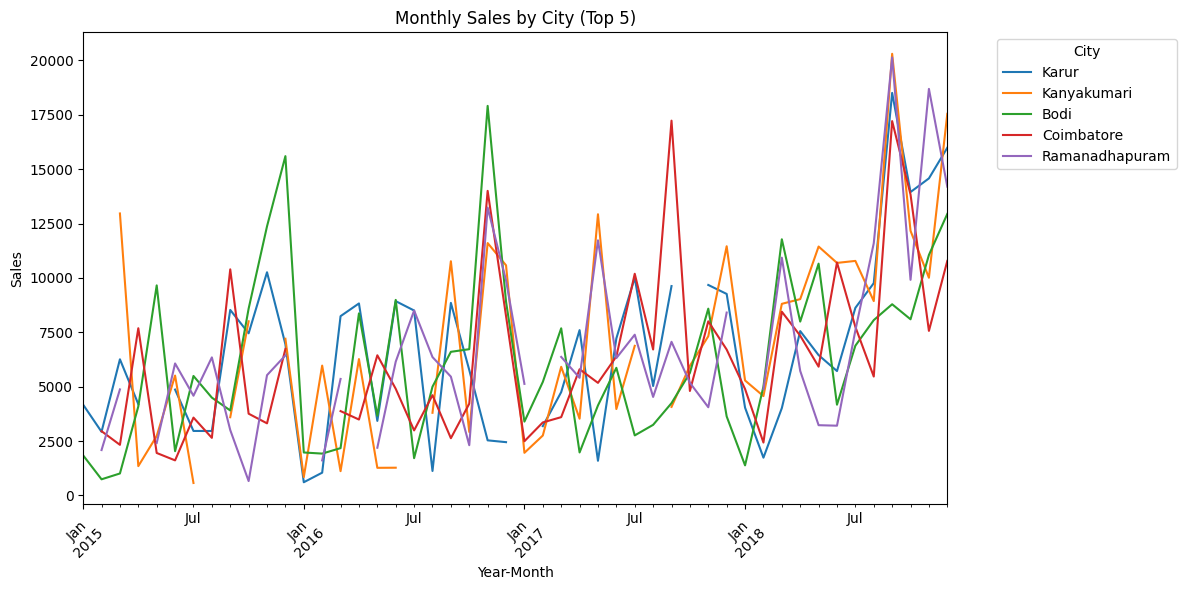

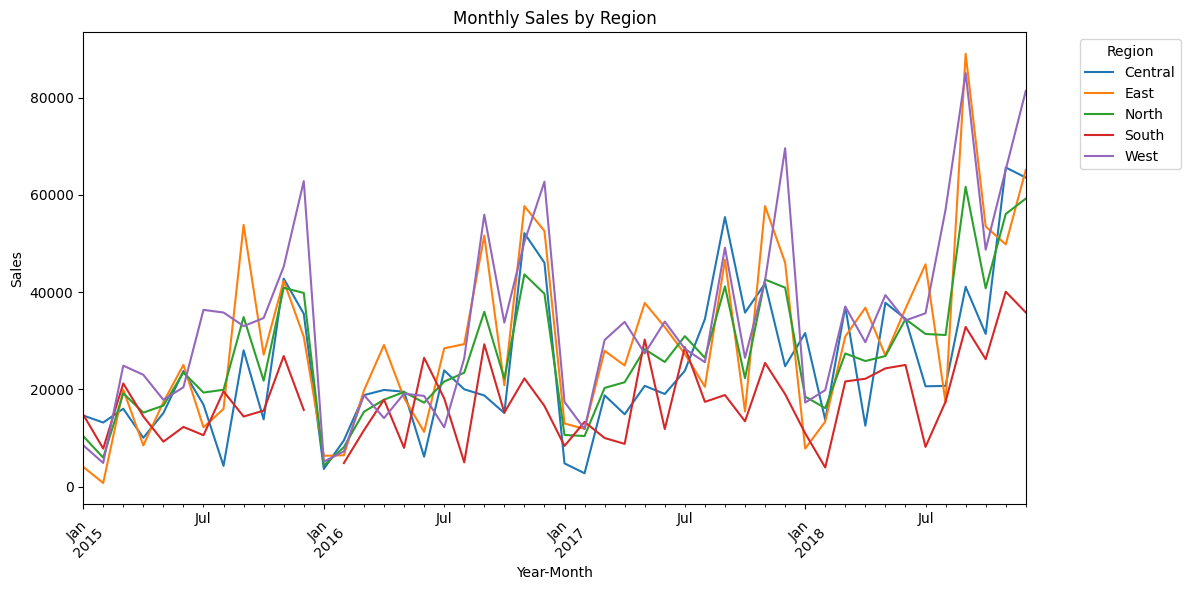

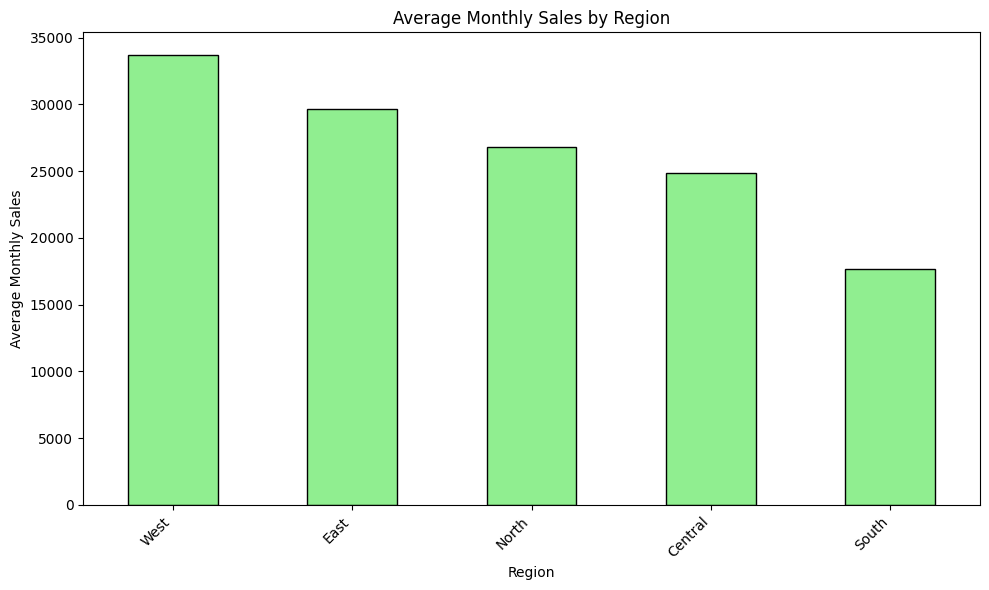

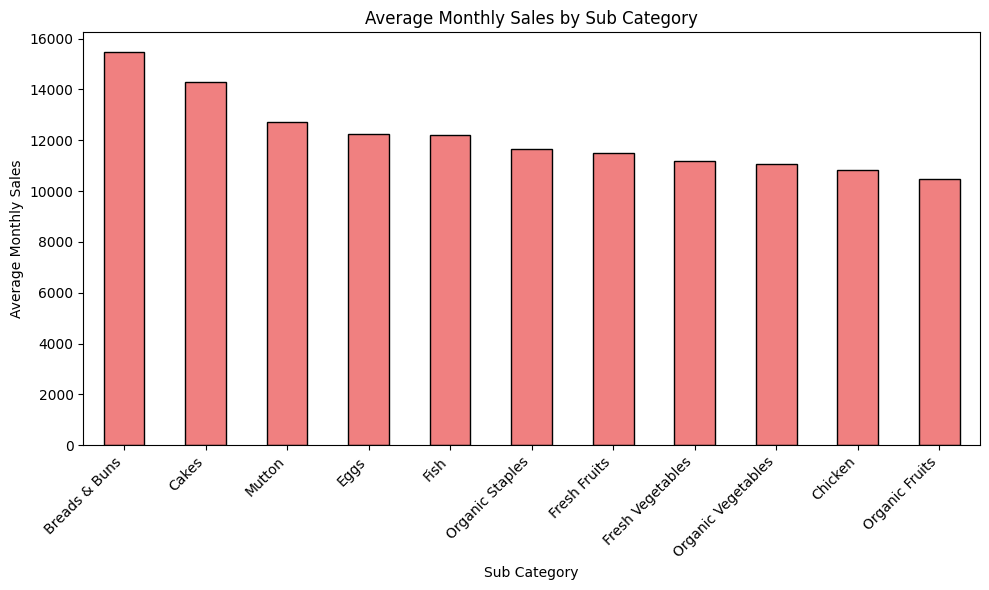

In [3]:
data.index = pd.to_datetime(data.index)
import plotly.graph_objects as go

# Create a dictionary to store the monthly demand for each subcategory
subcategory_monthly_demand = {}

# Group by 'Sub Category' and calculate monthly demand
for subcategory, group in df.groupby('Sub Category'):
    subcategory_monthly_demand[subcategory] = group.resample('ME')['Sales'].sum()

# Convert the dictionary into a DataFrame for easier handling (optional)
monthly_demand_df = pd.DataFrame(subcategory_monthly_demand)

# Plot the monthly demand for each subcategory (optional visualization)
monthly_demand_df.plot(subplots=True, figsize=(12, 10), title="Monthly Demand by Sub Category")
plt.tight_layout()
plt.show()


# Monthly Sales by City (Browser rendered)
data['YearMonth'] = data.index.to_period('M')
monthly_sales_by_city = data.groupby(['YearMonth', 'City'])['Sales'].sum().unstack()
fig = go.Figure()
for city in monthly_sales_by_city.columns:
    fig.add_trace(go.Scatter(
        x=monthly_sales_by_city.index.astype(str),  # Convert PeriodIndex to string for the x-axis
        y=monthly_sales_by_city[city],
        mode='lines',
        name=city 
    ))
fig.update_layout(
    title='Monthly Sales by City (Interactive)',
    xaxis_title='Year-Month',
    yaxis_title='Sales',
    xaxis=dict(tickangle=45),  
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(label='All Cities',
                      method='relayout',
                      args=['showlegend', True]),
                 dict(label='No Cities',
                      method='relayout',
                      args=['showlegend', False])]
    )]
)
import plotly.io as pio
pio.renderers.default = "browser"
fig.show()

# Average Monthly Sales by City
monthly_sales_by_city = data.groupby(['YearMonth', 'City'])['Sales'].sum()
average_monthly_sales_by_city = monthly_sales_by_city.groupby('City').mean()
average_monthly_sales_by_city = average_monthly_sales_by_city.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
average_monthly_sales_by_city.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Monthly Sales by City')
plt.xlabel('City')
plt.ylabel('Average Monthly Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Monthly Sales by City (Top 5)
data['YearMonth'] = data.index.to_period('M')
monthly_sales_by_city = data.groupby(['YearMonth', 'City'])['Sales'].sum().unstack()
top_5_cities = monthly_sales_by_city.sum(axis=0).nlargest(5).index
monthly_sales_top_5 = monthly_sales_by_city[top_5_cities]
plt.figure(figsize=(12, 6))
monthly_sales_top_5.plot(ax=plt.gca(), legend=True)
plt.title('Monthly Sales by City (Top 5)')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Monthly Sales by Region
monthly_sales_by_region = data.groupby(['YearMonth', 'Region'])['Sales'].sum().unstack()
plt.figure(figsize=(12, 6))
monthly_sales_by_region.plot(ax=plt.gca(), legend=True)
plt.title('Monthly Sales by Region')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Total sales by Region
# sales_by_region = data.groupby('Region')['Sales'].sum()
# plt.figure(figsize=(10, 6))
# sales_by_region.plot(kind='bar', color='skyblue')
# plt.title('Total Sales by Region')
# plt.xlabel('Region')
# plt.ylabel('Total Sales')
# plt.xticks(rotation=45)
# plt.show()

# Average Annual Sales by Region 
# data['Year'] = data.index.year
# annual_sales_by_region = data.groupby(['Year', 'Region'])['Sales'].sum()
# average_annual_sales_by_region = annual_sales_by_region.groupby('Region').mean()
# average_annual_sales_by_region = average_annual_sales_by_region.sort_values(ascending=False)
# plt.figure(figsize=(10, 6))
# average_annual_sales_by_region.plot(kind='bar', color='lightcoral', edgecolor='black')
# plt.title('Average Annual Sales by Region')
# plt.xlabel('Region')
# plt.ylabel('Average Annual Sales')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

# Average Monthly Sales by Region
monthly_sales_by_region = data.groupby(['YearMonth', 'Region'])['Sales'].sum()
average_monthly_sales_by_region = monthly_sales_by_region.groupby('Region').mean()
average_monthly_sales_by_region = average_monthly_sales_by_region.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
average_monthly_sales_by_region.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Monthly Sales by Region')
plt.xlabel('Region')
plt.ylabel('Average Monthly Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Total sales by Sub Category
# total_sales_by_sub_category = data.groupby('Sub Category')['Sales'].sum()
# total_sales_by_sub_category = total_sales_by_sub_category.sort_values(ascending=False)
# plt.figure(figsize=(12, 6))
# total_sales_by_sub_category.plot(kind='bar', color='skyblue', edgecolor='black')
# plt.title('Total Sales by Sub Category')
# plt.xlabel('Sub Category')
# plt.ylabel('Total Sales')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

# Average Monthly Sales by Sub Category
monthly_sales_by_sub_category = data.groupby(['YearMonth', 'Sub Category'])['Sales'].sum()
average_monthly_sales_by_sub_category = monthly_sales_by_sub_category.groupby('Sub Category').mean()
average_monthly_sales_by_sub_category = average_monthly_sales_by_sub_category.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
average_monthly_sales_by_sub_category.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Monthly Sales by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Average Monthly Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Using the Monthly demand for the Model training

In [4]:
# Checking for stationarity using Augmented Dickey Fuller test
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = "AIC")
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Number of Lags : ", dftest[2])
    print("4. Number of Observations used for ADF Regression and Critical Values calculation : ", dftest[3])
    print("5. Critical Values : ",)
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

In [5]:
ad_test(monthly_demand)        # P-value < 0.05 means data is stationary

1. ADF :  -3.566466819937405
2. P-Value :  0.006435436184314783
3. Number of Lags :  0
4. Number of Observations used for ADF Regression and Critical Values calculation :  47
5. Critical Values : 
	 1% :  -3.5778480370438146
	 5% :  -2.925338105429433
	 10% :  -2.6007735310095064


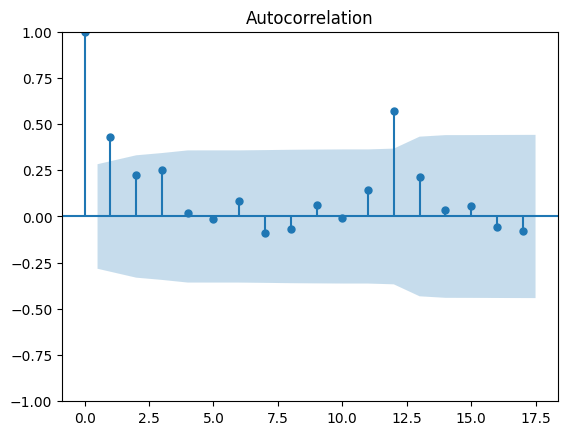

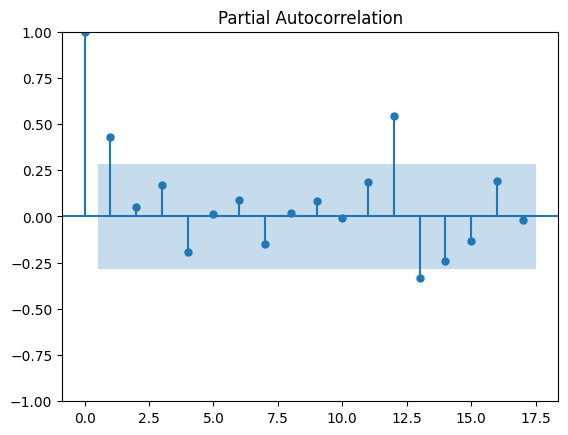

In [6]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.tsa.plot_acf(monthly_demand)
sm.graphics.tsa.plot_pacf(monthly_demand)
plt.show()


ARIMA : Split the Data into Training and Testing

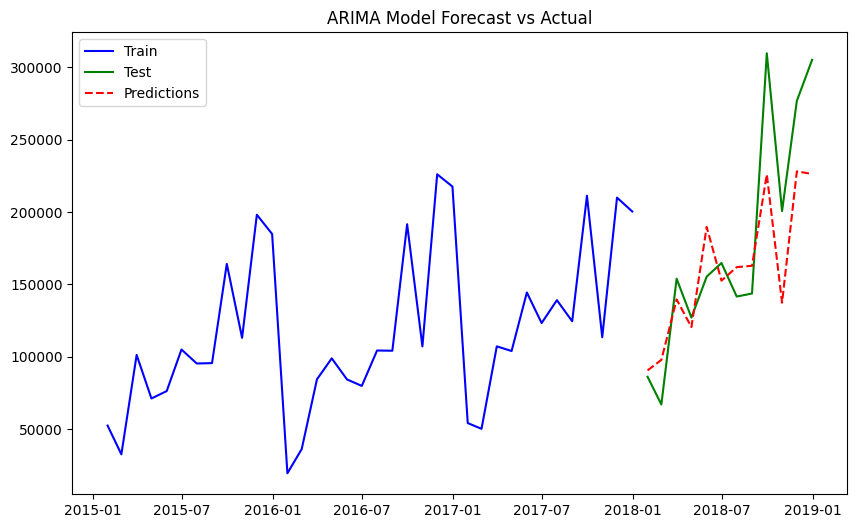

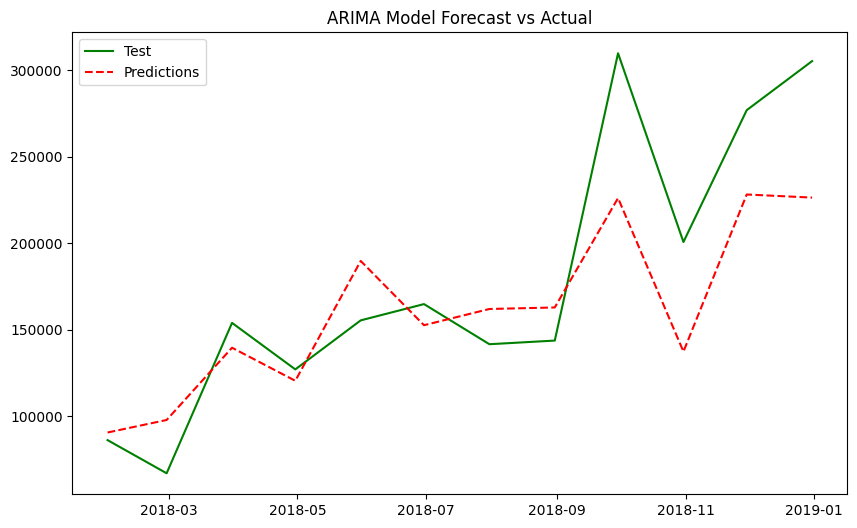

Root Mean Squared Error (RMSE): 43711.176867380425
Mean Absolute Error (MAE): 34727.197871934964
Mean Squared Error (MSE): 1910666983.1314137
R-squared: 0.6766508883762564
Mean Absolute Percentage Error (MAPE): 18.736891202454473%


In [7]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Check the shape of the data
#print(monthly_demand.shape)

# Split into train and test sets (assuming monthly data and forecasting next 12 periods)
train = monthly_demand.iloc[:-12]
test = monthly_demand.iloc[-12:]
#print(train.shape, test.shape)

# Fit the ARIMA model with (p=2, d=0, q=2)
model = ARIMA(train, order=(12, 2, 1))
model_fit = model.fit()

# Forecasting the next 12 values
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end, typ='levels')

# Plot predictions and actual test values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label="Train", color="blue")
plt.plot(test.index, test, label="Test", color="green")
plt.plot(pred.index, pred, label="Predictions", color="red", linestyle='--')
plt.legend()
plt.title("ARIMA Model Forecast vs Actual")
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label="Test", color="green")
plt.plot(pred.index, pred, label="Predictions", color="red", linestyle='--')
plt.legend()
plt.title("ARIMA Model Forecast vs Actual")
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

rmse = sqrt(mean_squared_error(test, pred))
mae = mean_absolute_error(test, pred)
mse = mean_squared_error(test, pred)
r2 = 1 - (sum((test - pred)**2) / sum((test - test.mean())**2))  # R-squared
mape = (abs((test - pred) / test)).mean() * 100  # Mean Absolute Percentage Error

# Print all relevant statistical variables
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


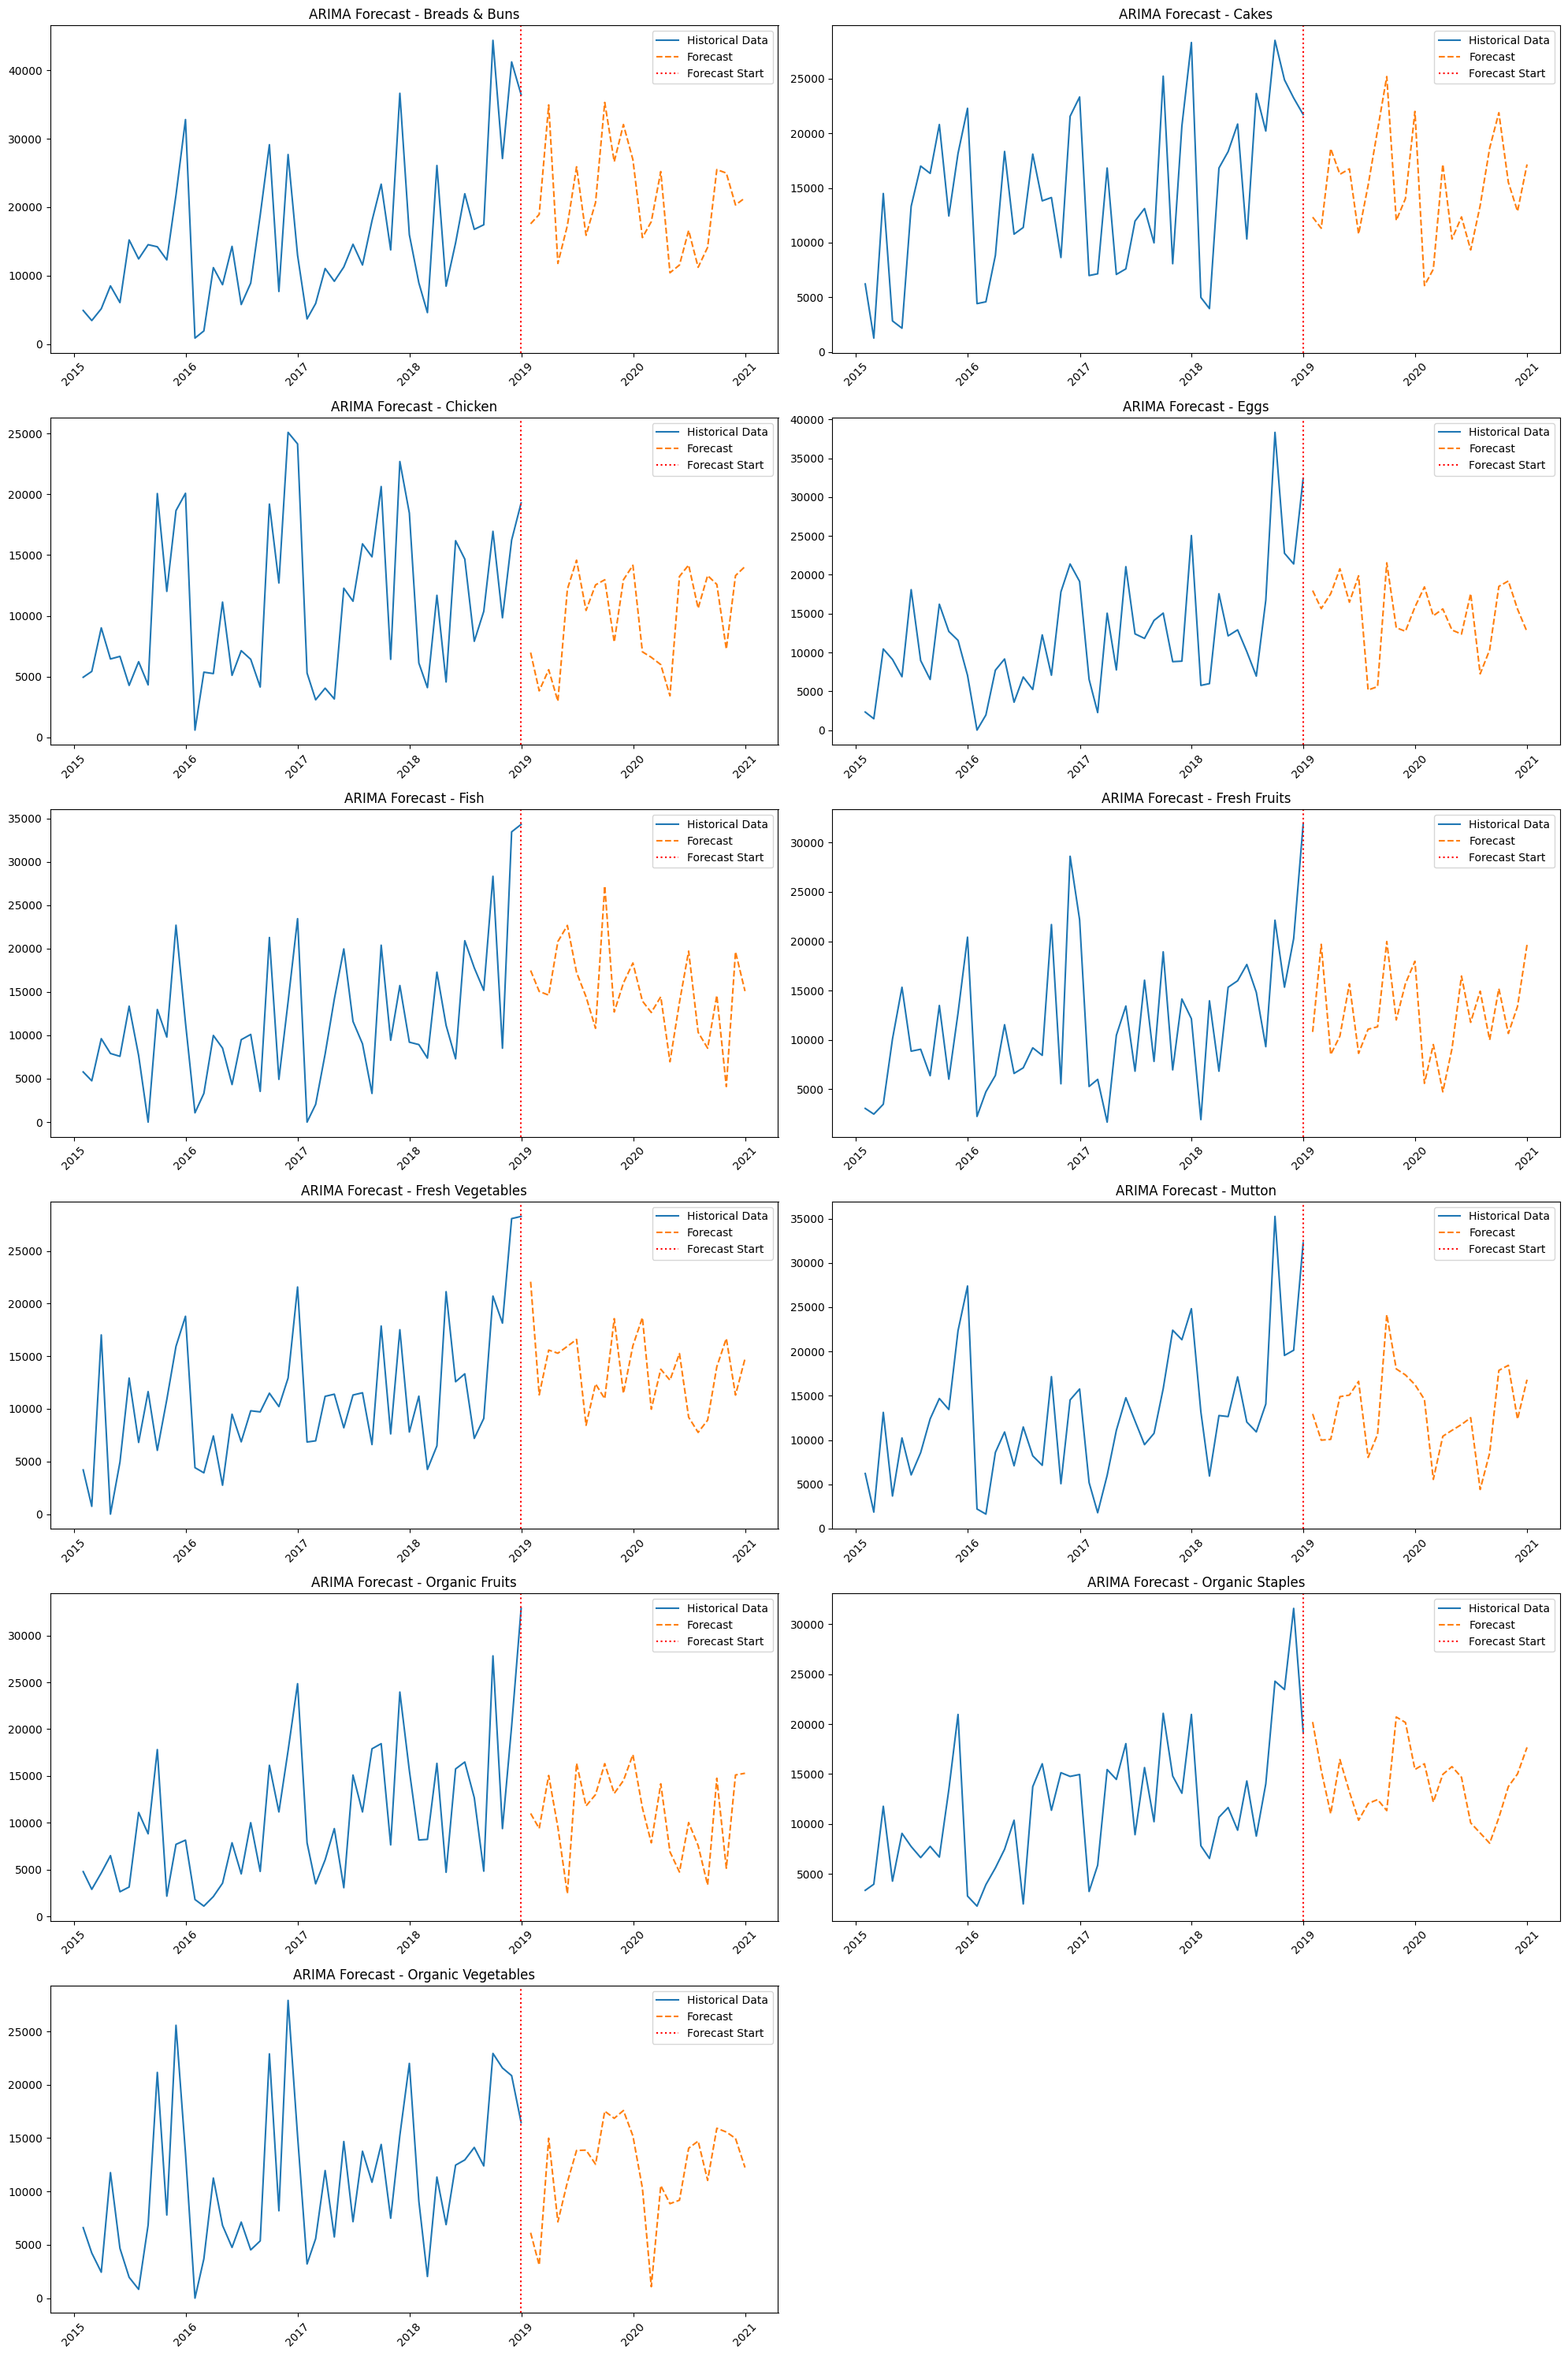


Forecast for Breads & Buns:
                 Date  Forecasted Sales
2019-01-31 2019-01-31      17575.860754
2019-02-28 2019-02-28      18949.945745
2019-03-31 2019-03-31      34945.248156
2019-04-30 2019-04-30      11791.869750
2019-05-31 2019-05-31      17326.022533
2019-06-30 2019-06-30      25902.834630
2019-07-31 2019-07-31      15894.560401
2019-08-31 2019-08-31      20688.764412
2019-09-30 2019-09-30      35309.675386
2019-10-31 2019-10-31      26644.919127
2019-11-30 2019-11-30      32081.686032
2019-12-31 2019-12-31      26938.961870
2020-01-31 2020-01-31      15561.972842
2020-02-29 2020-02-29      17890.249473
2020-03-31 2020-03-31      25207.886887
2020-04-30 2020-04-30      10425.187053
2020-05-31 2020-05-31      11548.893599
2020-06-30 2020-06-30      16609.986330
2020-07-31 2020-07-31      11218.309884
2020-08-31 2020-08-31      14143.619250
2020-09-30 2020-09-30      25500.377762
2020-10-31 2020-10-31      24990.159385
2020-11-30 2020-11-30      20332.355811
2020-12-31 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Function to apply ARIMA forecast for a single subcategory
def forecast_subcategory(monthly_demand):
    """
    Apply ARIMA forecasting to a single time series
    
    Parameters:
    monthly_demand (pd.Series): Monthly demand time series
    
    Returns:
    tuple: Historical data, forecast, forecast dates, and fitted model
    """
    # Ensure the time series is sorted
    monthly_demand = monthly_demand.sort_index()
    
    # Fit ARIMA model
    # You can adjust these parameters based on your data characteristics
    model = ARIMA(monthly_demand, order=(24, 0, 24))
    
    model_fit = model.fit()
    
    # Forecast for the next 2 years (24 months)
    forecast_steps = 24
    forecast = model_fit.forecast(steps=forecast_steps)
    
    # Generate future dates
    forecast_dates = pd.date_range(start=monthly_demand.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')
    
    return monthly_demand, forecast, forecast_dates, model_fit

# Prepare monthly demand for each subcategory
subcategory_monthly_demand = {}
for subcategory, group in df.groupby('Sub Category'):
    subcategory_monthly_demand[subcategory] = group.resample('ME')['Sales'].sum()

# Create forecasts for each subcategory
forecasts = {}
models = {}

# Plotting setup
num_subcategories = len(subcategory_monthly_demand)
cols = 2
rows = (num_subcategories + 1) // 2  # Ceiling division

plt.figure(figsize=(20, 5*rows))

# Iterate through subcategories and create forecasts
for i, (subcategory, monthly_demand) in enumerate(subcategory_monthly_demand.items(), 1):
    # Remove any NaN values
    monthly_demand = monthly_demand.dropna()
    
    # Apply forecast
    historical_data, forecast, forecast_dates, model_fit = forecast_subcategory(monthly_demand)
    
    # Store results
    forecasts[subcategory] = forecast
    models[subcategory] = model_fit
    
    # Plotting
    plt.subplot(rows, cols, i)
    plt.plot(historical_data.index, historical_data, label="Historical Data")
    plt.plot(forecast_dates, forecast, label="Forecast", linestyle='--')
    plt.axvline(x=historical_data.index[-1], color='red', linestyle=':', label="Forecast Start")
    plt.title(f"ARIMA Forecast - {subcategory}")
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Optional: Print out forecast values for each subcategory
for subcategory, forecast in forecasts.items():
    print(f"\nForecast for {subcategory}:")
    forecast_df = pd.DataFrame({
        'Date': pd.date_range(start=monthly_demand.index[-1] + pd.Timedelta(days=1), periods=len(forecast), freq='M'),
        'Forecasted Sales': forecast
    })
    print(forecast_df)

SARIMA:

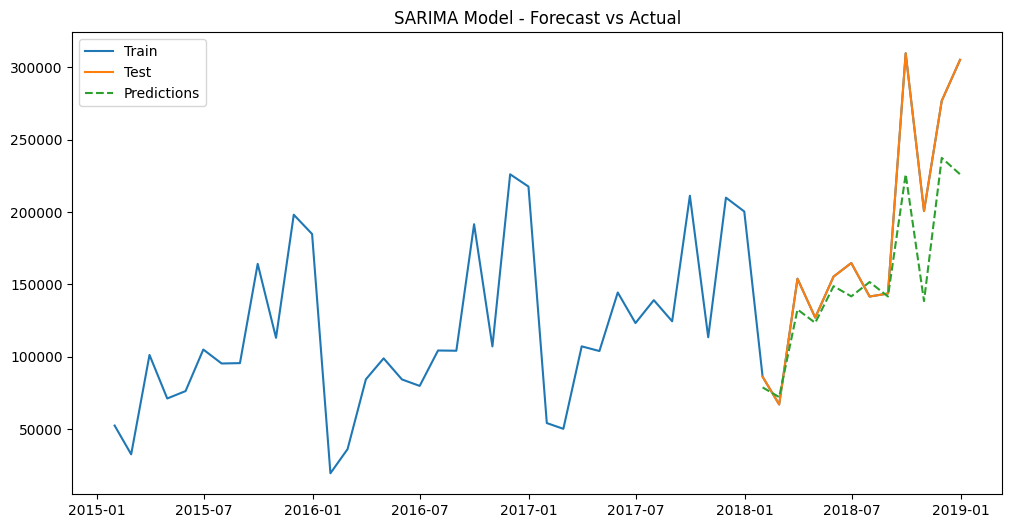

Root Mean Squared Error (RMSE): 40713.57411099468
Mean Absolute Error (MAE): 28614.944180436123
Mean Squared Error (MSE): 1657595116.8914566
R-squared: 0.719479159261819
Mean Absolute Percentage Error (MAPE): 13.14513228146559%


In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Split your data into train and test sets
train = monthly_demand.iloc[:-12]
test = monthly_demand.iloc[-12:]

# Define SARIMA model parameters (adjust as needed)
# Seasonal period is 12 (annual seasonality, assuming monthly data)
model = SARIMAX(train, 
                order=(1,0,1),       # ARIMA(p,d,q) part
                seasonal_order=(2,0,2, 12),  # Seasonal components (P,D,Q,s)
                enforce_stationarity=False, 
                enforce_invertibility=False)

# Fit the model
model_fit = model.fit()

# Print the model summary
# print(model_fit.summary())

# Forecast
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end, type='levels')

# Print predictions
#print(pred)

# Plot predictions and actual values
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train, label="Train")
plt.plot(monthly_demand.index, monthly_demand, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(pred.index, pred, label="Predictions", linestyle='--')
plt.legend()
plt.title("SARIMA Model - Forecast vs Actual")
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')


rmse = sqrt(mean_squared_error(test, pred))
mae = mean_absolute_error(test, pred)
mse = mean_squared_error(test, pred)
r2 = 1 - (sum((test - pred)**2) / sum((test - test.mean())**2))  # R-squared
mape = (abs((test - pred) / test)).mean() * 100  # Mean Absolute Percentage Error

# Print all relevant statistical variables
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


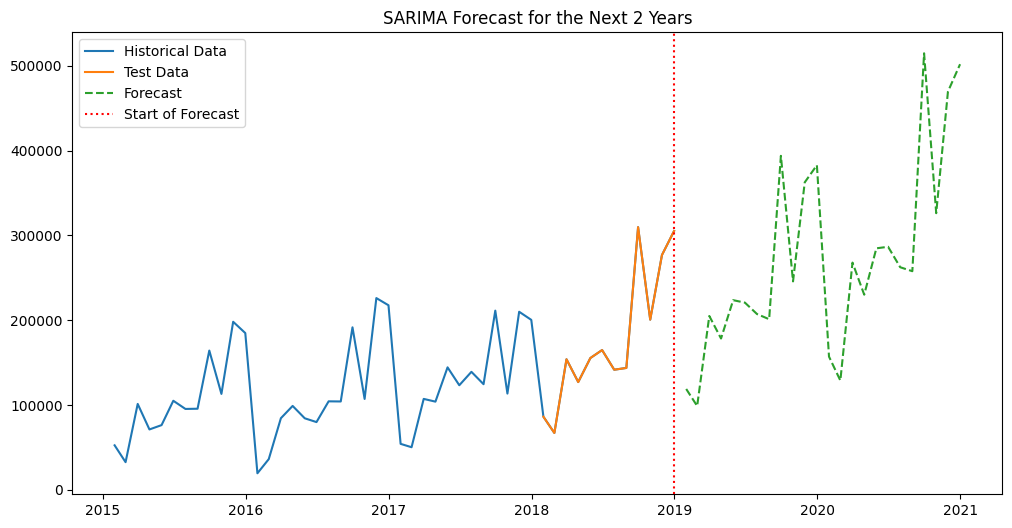

In [10]:
# Refit the model using the entire dataset (train + test)
model = SARIMAX(monthly_demand, 
                order=(1, 0, 0),       # ARIMA(p,d,q) part
                seasonal_order=(2, 0, 1, 12),  # Seasonal components (P,D,Q,s)
                enforce_stationarity=False, 
                enforce_invertibility=False)

model_fit = model.fit()

# Forecast for the next 2 years (24 months)
forecast_steps = 24  # Forecasting next 2 years (assuming monthly data)
forecast = model_fit.predict(start=len(monthly_demand), end=len(monthly_demand) + forecast_steps - 1, type='levels')

# Generate future dates
forecast_dates = pd.date_range(start=monthly_demand.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_demand.index, monthly_demand, label="Historical Data")
plt.plot(test.index, test, label="Test Data")
plt.plot(forecast_dates, forecast, label="Forecast", linestyle='--')
plt.axvline(x=monthly_demand.index[-1], color='red', linestyle=':', label="Start of Forecast")
plt.legend()
plt.title("SARIMA Forecast for the Next 2 Years")
plt.show()

# Optionally print the forecast values
#print(forecast)


In [11]:
# shelf_life = {
#     'Breads & Buns': 7,            
#     'Cakes': 3,                   
#     'Chicken': 2,                 
#     'Eggs': 21,                   
#     'Fish': 2,                    
#     'Fresh Fruits': 5,             
#     'Fresh Vegetables': 7,        
#     'Mutton': 2,                   
#     'Organic Fruits': 7,          
#     'Organic Staples': 30,         
#     'Organic Vegetables': 7        
# }

# data['Expiry Date'] = data.index + data['Sub Category'].map(shelf_life).apply(lambda x: pd.Timedelta(days=x))

# # Save the modified DataFrame back to the CSV file
# data.to_csv('data.csv')

# print(data.head())

In [12]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import numpy as np

# # Function to apply SARIMA forecast for a single subcategory
# def forecast_subcategory(monthly_demand):
#     """
#     Apply SARIMA forecasting to a single time series
    
#     Parameters:
#     monthly_demand (pd.Series): Monthly demand time series
    
#     Returns:
#     tuple: Historical data, forecast, forecast dates, and fitted model
#     """
#     # Ensure the time series is sorted
#     monthly_demand = monthly_demand.sort_index()
    
#     # Fit SARIMA model
#     model = SARIMAX(monthly_demand, 
#                     order=(1, 0, 0),       # ARIMA(p,d,q) part
#                     seasonal_order=(2, 0, 1, 12),  # Seasonal components (P,D,Q,s)
#                     enforce_stationarity=False, 
#                     enforce_invertibility=False)
    
#     model_fit = model.fit(disp=False)  # Suppress output
    
#     # Forecast for the next 2 years (24 months)
#     forecast_steps = 24
#     forecast = model_fit.predict(start=len(monthly_demand), end=len(monthly_demand) + forecast_steps - 1, type='levels')
    
#     # Generate future dates
#     forecast_dates = pd.date_range(start=monthly_demand.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')
    
#     return monthly_demand, forecast, forecast_dates, model_fit

# # Prepare monthly demand for each subcategory
# subcategory_monthly_demand = {}
# for subcategory, group in df.groupby('Sub Category'):
#     subcategory_monthly_demand[subcategory] = group.resample('ME')['Sales'].sum()

# # Create forecasts for each subcategory
# forecasts = {}
# models = {}

# # Plotting setup
# num_subcategories = len(subcategory_monthly_demand)
# cols = 2
# rows = (num_subcategories + 1) // 2  # Ceiling division

# plt.figure(figsize=(20, 5*rows))

# # Iterate through subcategories and create forecasts
# for i, (subcategory, monthly_demand) in enumerate(subcategory_monthly_demand.items(), 1):
#     # Remove any NaN values
#     monthly_demand = monthly_demand.dropna()
    
#     # Apply forecast
#     historical_data, forecast, forecast_dates, model_fit = forecast_subcategory(monthly_demand)
    
#     # Store results
#     forecasts[subcategory] = forecast
#     models[subcategory] = model_fit
    
#     # Plotting
#     plt.subplot(rows, cols, i)
#     plt.plot(historical_data.index, historical_data, label="Historical Data")
#     plt.plot(forecast_dates, forecast, label="Forecast", linestyle='--')
#     plt.axvline(x=historical_data.index[-1], color='red', linestyle=':', label="Forecast Start")
#     plt.title(f"SARIMA Forecast - {subcategory}")
#     plt.legend()
#     plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

# # Optional: Print out forecast values for each subcategory
# for subcategory, forecast in forecasts.items():
#     print(f"\nForecast for {subcategory}:")
#     forecast_df = pd.DataFrame({
#         'Date': forecast.index,
#         'Forecasted Sales': forecast.values
#     })
#     print(forecast_df)

In [13]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# import numpy as np
# import warnings

# # Suppress warnings
# warnings.filterwarnings('ignore')

# # Function to apply ARIMA forecast for a single subcategory
# def forecast_subcategory(monthly_demand):
#     """
#     Apply ARIMA forecasting to a single time series
    
#     Parameters:
#     monthly_demand (pd.Series): Monthly demand time series
    
#     Returns:
#     tuple: Historical data, forecast, forecast dates, and fitted model
#     """
#     # Ensure the time series is sorted
#     monthly_demand = monthly_demand.sort_index()
    
#     # Fit ARIMA model
#     # You can adjust these parameters based on your data characteristics
#     model = ARIMA(monthly_demand, order=(24, 0, 24))
    
#     model_fit = model.fit()
    
#     # Forecast for the next 2 years (24 months)
#     forecast_steps = 24
#     forecast = model_fit.forecast(steps=forecast_steps)
    
#     # Generate future dates
#     forecast_dates = pd.date_range(start=monthly_demand.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')
    
#     return monthly_demand, forecast, forecast_dates, model_fit

# # Prepare monthly demand for each subcategory
# subcategory_monthly_demand = {}
# for subcategory, group in df.groupby('Sub Category'):
#     subcategory_monthly_demand[subcategory] = group.resample('ME')['Sales'].sum()

# # Create forecasts for each subcategory
# forecasts = {}
# models = {}

# # Iterate through subcategories and create forecasts
# for subcategory, monthly_demand in subcategory_monthly_demand.items():
#     # Remove any NaN values
#     monthly_demand = monthly_demand.dropna()
    
#     # Apply forecast
#     historical_data, forecast, forecast_dates, model_fit = forecast_subcategory(monthly_demand)
    
#     # Store results
#     forecasts[subcategory] = forecast
#     models[subcategory] = model_fit
    
#     # Create a separate figure for each subcategory
#     plt.figure(figsize=(12, 6))
#     plt.plot(historical_data.index, historical_data, label="Historical Data")
#     plt.plot(forecast_dates, forecast, label="Forecast", linestyle='--')
#     plt.axvline(x=historical_data.index[-1], color='red', linestyle=':', label="Forecast Start")
#     plt.title(f"ARIMA Forecast - {subcategory}")
#     plt.legend()
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # Optional: Print out forecast values for each subcategory
# for subcategory, forecast in forecasts.items():
#     print(f"\nForecast for {subcategory}:")
#     forecast_df = pd.DataFrame({
#         'Date': pd.date_range(start=monthly_demand.index[-1] + pd.Timedelta(days=1), periods=len(forecast), freq='M'),
#         'Forecasted Sales': forecast
#     })
#     print(forecast_df)

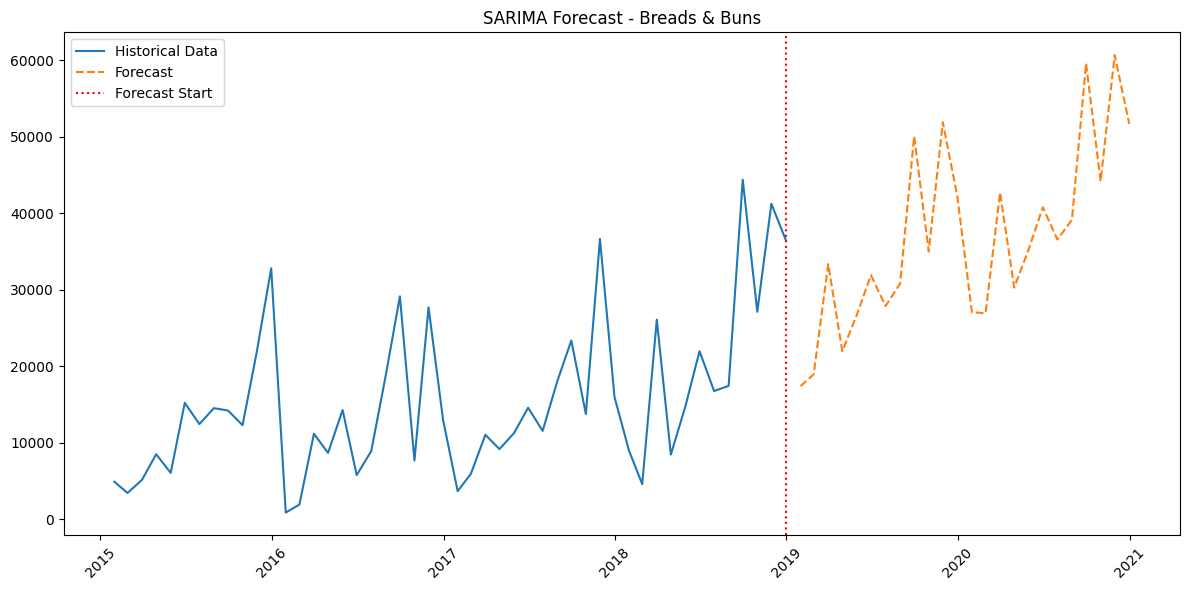

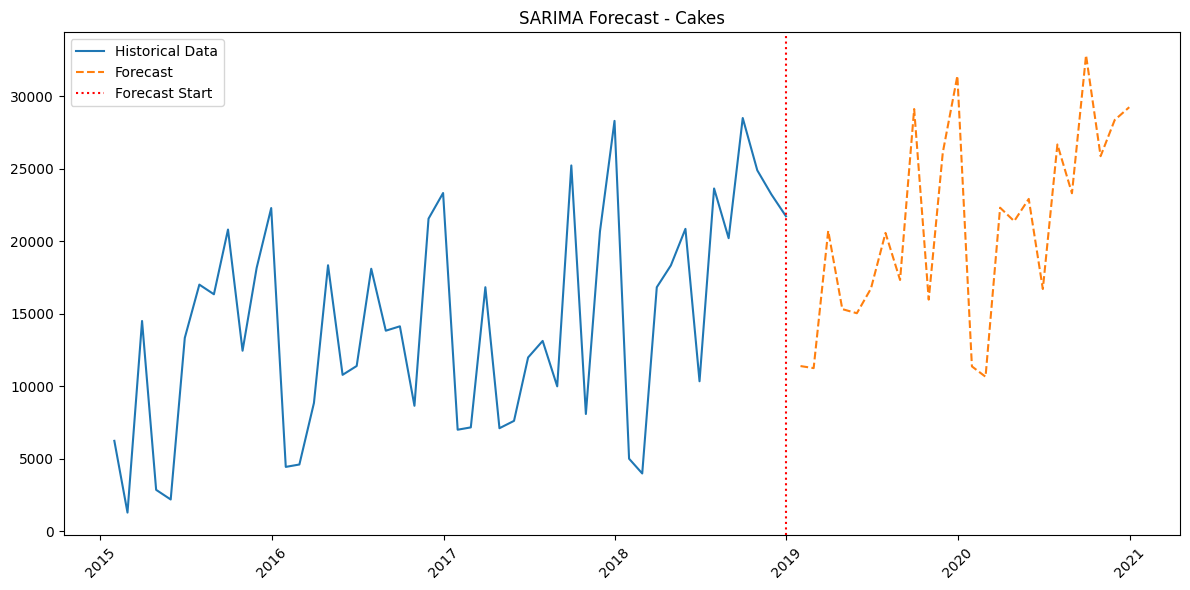

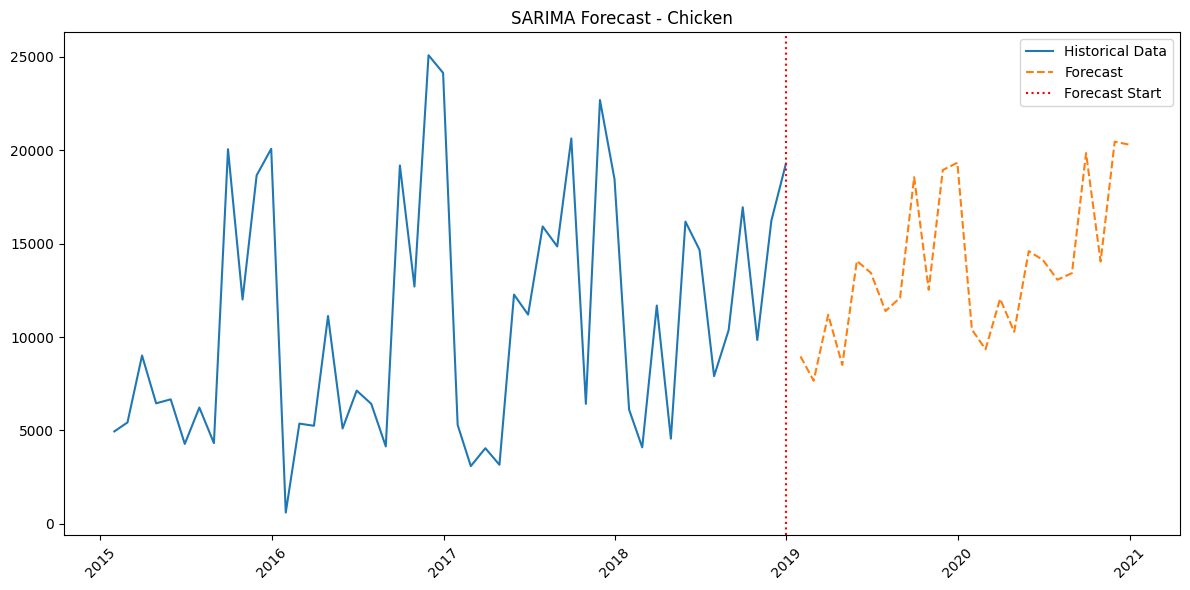

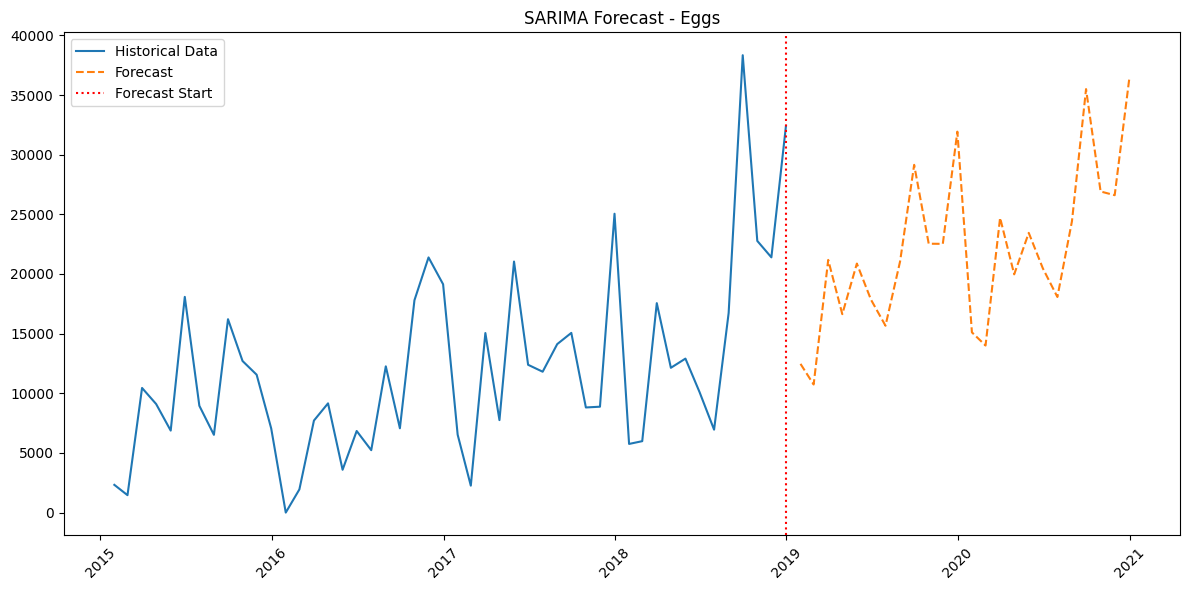

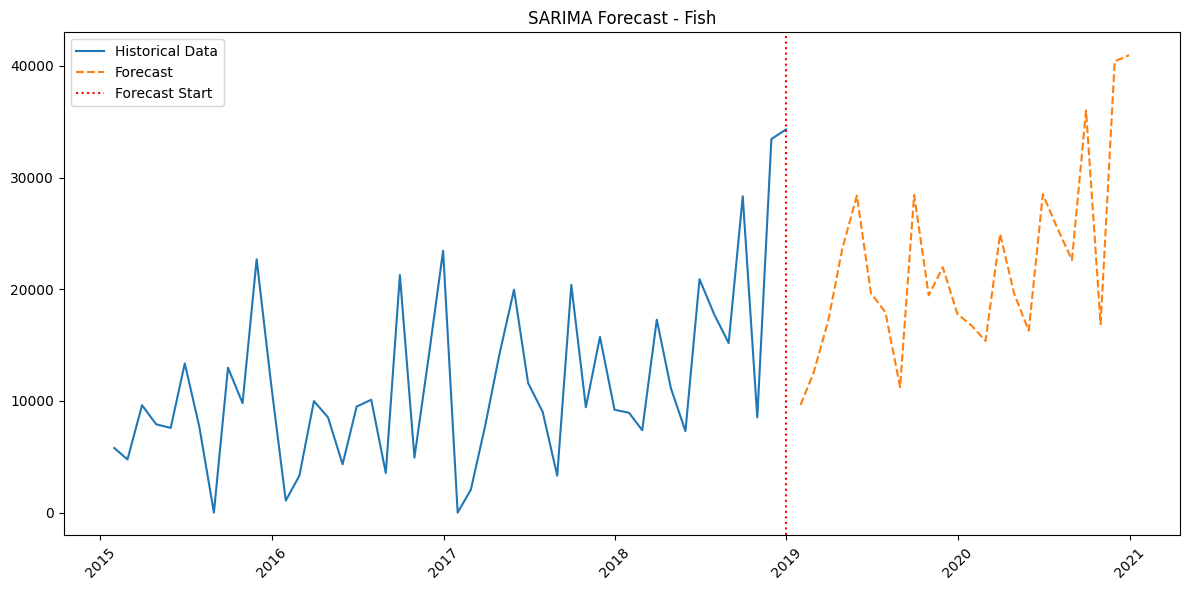

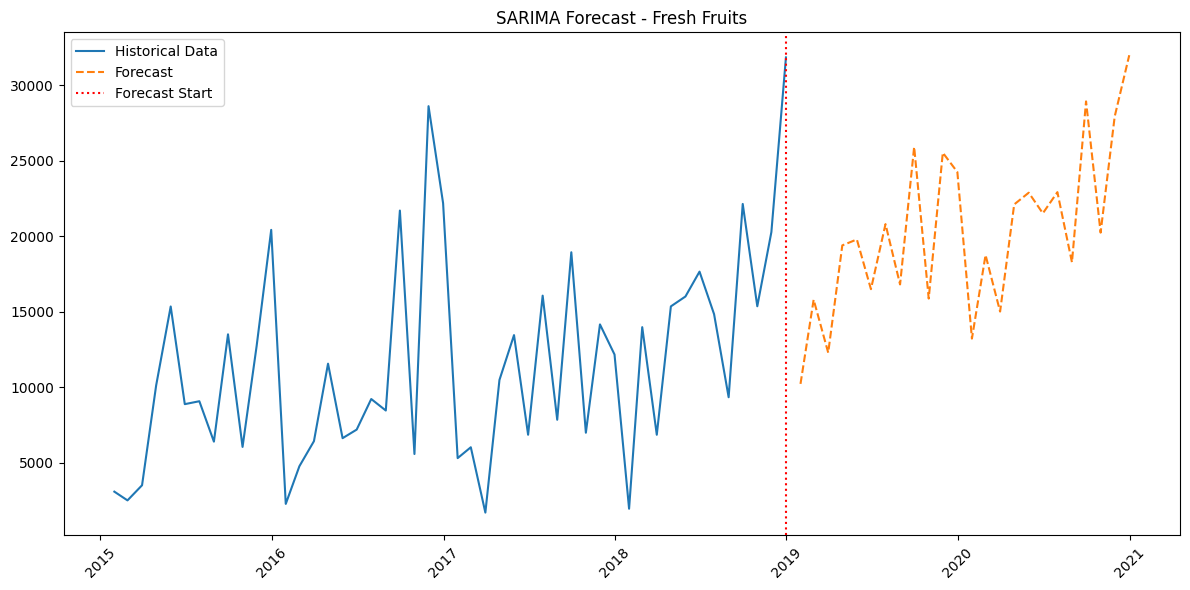

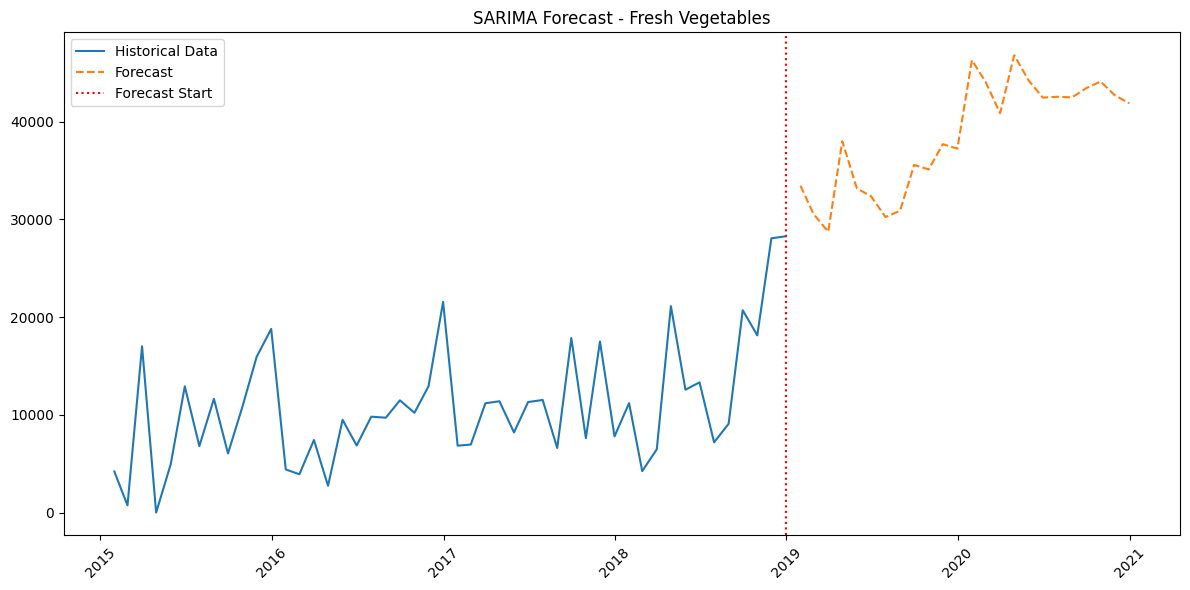

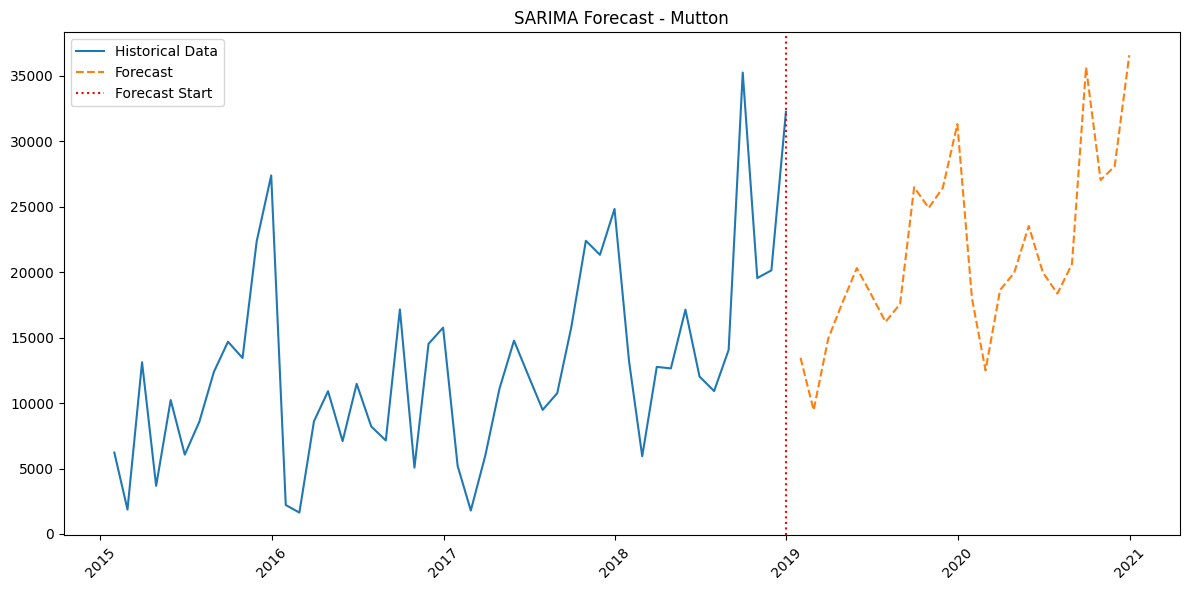

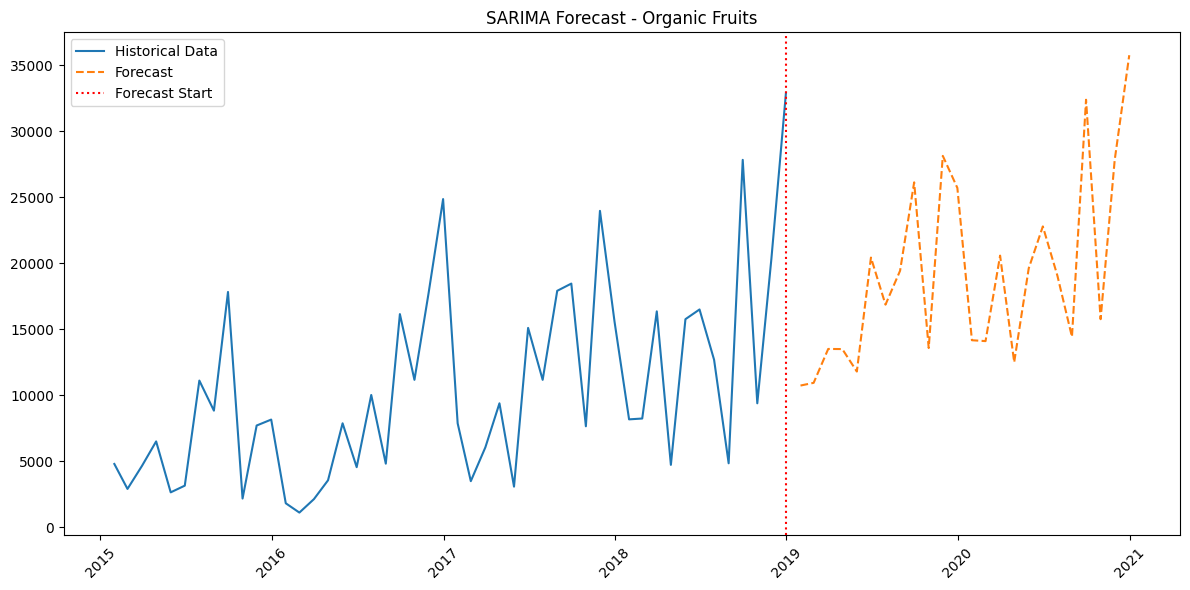

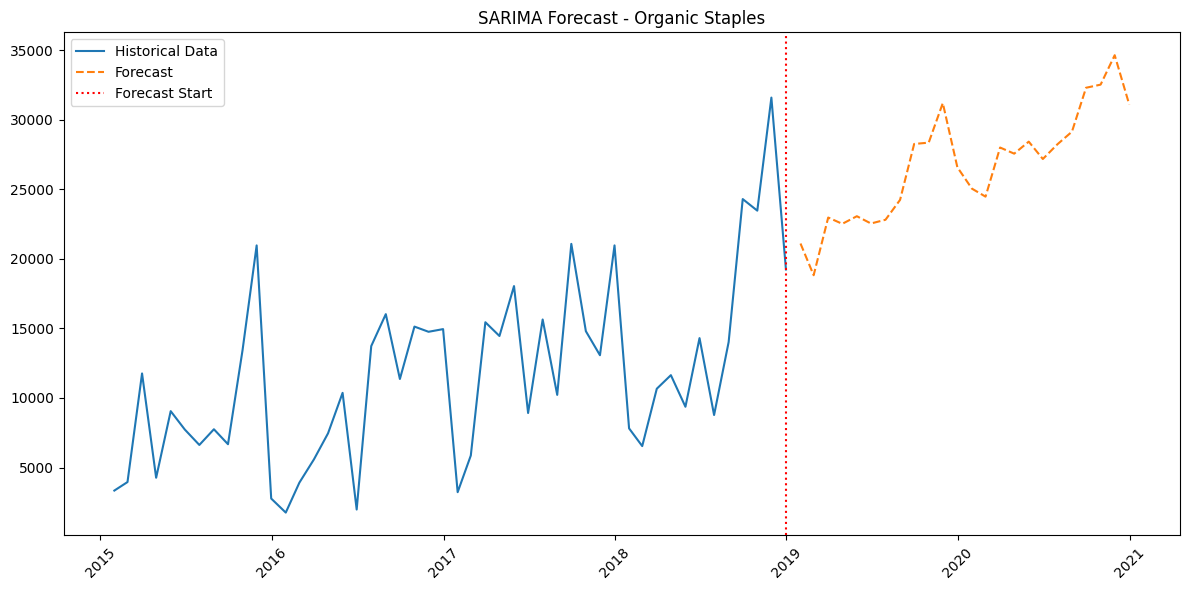

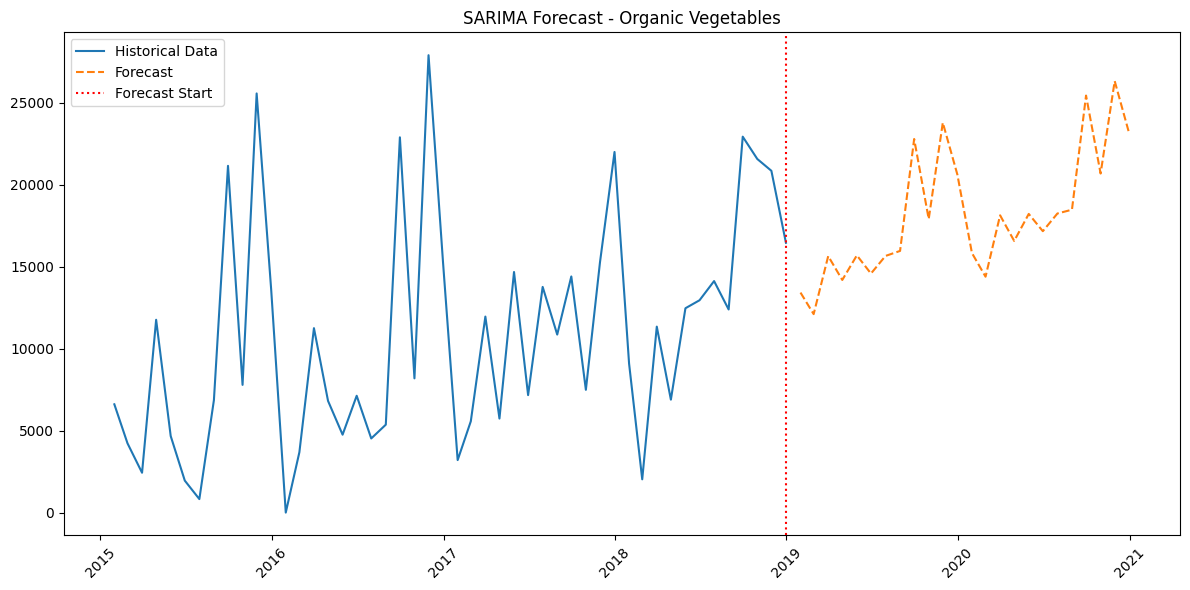


Forecast for Breads & Buns:
                 Date  Forecasted Sales
2019-01-31 2019-01-31      17405.451461
2019-02-28 2019-02-28      18928.756764
2019-03-31 2019-03-31      33349.633234
2019-04-30 2019-04-30      21969.893804
2019-05-31 2019-05-31      26734.774167
2019-06-30 2019-06-30      31907.750214
2019-07-31 2019-07-31      27866.954901
2019-08-31 2019-08-31      30790.022351
2019-09-30 2019-09-30      50070.853293
2019-10-31 2019-10-31      35009.612538
2019-11-30 2019-11-30      51891.466008
2019-12-31 2019-12-31      42166.338295
2020-01-31 2020-01-31      27068.386305
2020-02-29 2020-02-29      26936.462386
2020-03-31 2020-03-31      42703.957085
2020-04-30 2020-04-30      30279.054076
2020-05-31 2020-05-31      35316.361073
2020-06-30 2020-06-30      40779.623925
2020-07-31 2020-07-31      36567.646233
2020-08-31 2020-08-31      39148.192548
2020-09-30 2020-09-30      59589.386367
2020-10-31 2020-10-31      44194.688981
2020-11-30 2020-11-30      60658.193540
2020-12-31 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Function to apply SARIMA forecast for a single subcategory
def forecast_subcategory(monthly_demand):
    """
    Apply SARIMA forecasting to a single time series
    
    Parameters:
    monthly_demand (pd.Series): Monthly demand time series
    
    Returns:
    tuple: Historical data, forecast, forecast dates, and fitted model
    """
    # Ensure the time series is sorted
    monthly_demand = monthly_demand.sort_index()
    
    # Fit SARIMA model
    model = SARIMAX(monthly_demand, 
                    order=(1, 1, 1),       # ARIMA(p,d,q) part
                    seasonal_order=(1, 1, 1, 12),  # Seasonal components (P,D,Q,s)
                    enforce_stationarity=False, 
                    enforce_invertibility=False)
    
    model_fit = model.fit(disp=False)  # Suppress output
    
    # Forecast for the next 2 years (24 months)
    forecast_steps = 24
    forecast = model_fit.predict(start=len(monthly_demand), end=len(monthly_demand) + forecast_steps - 1, type='levels')
    
    # Generate future dates
    forecast_dates = pd.date_range(start=monthly_demand.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')
    
    return monthly_demand, forecast, forecast_dates, model_fit

# Prepare monthly demand for each subcategory
subcategory_monthly_demand = {}
for subcategory, group in df.groupby('Sub Category'):
    subcategory_monthly_demand[subcategory] = group.resample('ME')['Sales'].sum()

# Create forecasts for each subcategory
forecasts = {}
models = {}

# Iterate through subcategories and create forecasts
for subcategory, monthly_demand in subcategory_monthly_demand.items():
    # Remove any NaN values
    monthly_demand = monthly_demand.dropna()
    
    # Apply forecast
    historical_data, forecast, forecast_dates, model_fit = forecast_subcategory(monthly_demand)
    
    # Store results
    forecasts[subcategory] = forecast
    models[subcategory] = model_fit
    
    # Create a separate figure for each subcategory
    plt.figure(figsize=(12, 6))
    plt.plot(historical_data.index, historical_data, label="Historical Data")
    plt.plot(forecast_dates, forecast, label="Forecast", linestyle='--')
    plt.axvline(x=historical_data.index[-1], color='red', linestyle=':', label="Forecast Start")
    plt.title(f"SARIMA Forecast - {subcategory}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Optional: Print out forecast values for each subcategory
for subcategory, forecast in forecasts.items():
    print(f"\nForecast for {subcategory}:")
    forecast_df = pd.DataFrame({
        'Date': pd.date_range(start=monthly_demand.index[-1] + pd.Timedelta(days=1), periods=len(forecast), freq='M'),
        'Forecasted Sales': forecast
    })
    print(forecast_df)

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
print(monthly_demand_df.columns)
# Prepare the time-series data (monthly demand)
monthly_demand_df.set_index('Date', inplace=True)
y = monthly_demand_df['Quantity']

# Fit the SARIMA model
sarima_model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust orders based on your data
sarima_result = sarima_model.fit(disp=False)

# Get SARIMA residuals (these represent the "error" or unexplained part of the time-series)
sarima_residuals = sarima_result.resid


Index(['Breads & Buns', 'Cakes', 'Chicken', 'Eggs', 'Fish', 'Fresh Fruits',
       'Fresh Vegetables', 'Mutton', 'Organic Fruits', 'Organic Staples',
       'Organic Vegetables'],
      dtype='object')


KeyError: "None of ['Date'] are in the columns"